تبدیل هندسی ،جابجاکردن همه پیکسل های تصویر ازمکان اولیه به مکانی جدید طبق یک دستورالعمل خاص است .این دستورالعمل براساس نوع تبدیل هندسی تعیین میشودوبه آن ماتریس تبدیل گویندانواع تبدیلات هندسی مقیاس-آفین-پرسپکتیو-ریختی

#  تبدیلات مقیاس

# تبدیل مقیاس معمولی

dst = cv2.resize(imag,dSize,fx,fy,interpolation)

image=تصویر ورودی

dSize=ابعاد تصویر خروجی که در صورت داشتن مقدار 2پارامتر بعدی مقدار داده نمیشود

fx=ضریب تغییر مقیاس عرض

fy=ضریب تغییر مقیاس ارتفاع(اگر ار این 2 پارامتر استفاده شود dSize=None)

interpolation=الگوریتمی که برای تغییر مقیاس استفاده میشود

In [3]:
import cv2

img = cv2.imread("pelak.jpeg")
interpolations = [("INTER_NEAREST",cv2.INTER_NEAREST),("INTER_LINEAR",cv2.INTER_LINEAR),
                  ("INTER_AREA",cv2.INTER_AREA),("INTER_CUBIC",cv2.INTER_CUBIC),("INTER_LANCZOS4",cv2.INTER_LANCZOS4)]
print(img.shape)
for i in range(len(interpolations)):
    dst = cv2.resize(img,None,fx=1,fy=1,interpolation=interpolations[i][1])
    cv2.imshow(f"{interpolations[i][0]}",dst)
    cv2.waitKey()
cv2.destroyAllWindows()    

(445, 662, 3)


In [1]:
import cv2

img = cv2.imread("pelak.jpeg")
interpolations = [("INTER_NEAREST",cv2.INTER_NEAREST),("INTER_LINEAR",cv2.INTER_LINEAR),
                  ("INTER_AREA",cv2.INTER_AREA),("INTER_CUBIC",cv2.INTER_CUBIC),("INTER_LANCZOS4",cv2.INTER_LANCZOS4)]

for i in range(len(interpolations)):
    dst = cv2.resize(img,(800,600),interpolation=interpolations[i][1])
    cv2.imshow(f"{interpolations[i][0]}",dst)
    cv2.waitKey()
cv2.destroyAllWindows()    

راه دیگر تغییر مقیاس معمولی

import imutils 

imutils.resize(image,width,height,interpolation)

# تغییر مقیاس هرمی

در این روش تصویر با مقادیر ثابت کوچک یا بزرگ میشود

cv2.pyrDown(img)

cv2.pyrUp(img)

در این دوتابع کوچک کردن با حذف سطرها و ستون ها اتفاق میوفتد

وبزرگ کردن بر اساس روشنایی پیکسل های اطراف اتفاق میوفتد و عکس به حالت بلور در می آید

In [1]:
import cv2
import time

img = cv2.imread("s.png")
stepsize = 30
x=y= 60
clone = img.copy()
while True:
    for i in range(3):
        for height in range(0,img.shape[0],stepsize):
            for width in range(0,img.shape[1],stepsize):
                if (width+x)>=img.shape[1] or (height+y)>=img.shape[0]:
                    continue
                clone = img.copy()
                cv2.rectangle(clone,(width,height),(width+x,height+y),(0,255,0),2)
                cv2.imshow("original",clone)
                key = cv2.waitKey(100)
                if key == 27:
                    break
            if key==27:
                break
        img = cv2.pyrDown(img)
        if key==27:
            break
    break
cv2.destroyAllWindows()    


# چرخش تصویر

cv2.rotate(src,rotateCode,dst)

In [4]:
import cv2
img1 = cv2.imread(r"D:\jupiter\OpenCv\face1.jpg")
result = cv2.rotate(img1,cv2.ROTATE_90_CLOCKWISE)

cv2.imshow("result",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# تبدیلات آفین


برای حرکت جسم در دو بعد استفاده میشود انتقال و دوران

ابتدا باید ماتریس انتقال یا دوران را ایجاد کرده وبعد روی تصویر اعمال کنیم


# ماتریس تبدیل

M= cv2.getAffineTransform(src,dst)

src=float32 مختصات 3 نقطه دلخواه از تصویربا فرمت 

dst=بعد از اعمال تبدیلfloat32 مختصات نهایی همان 3 نقطه دلخواه از تصویربا فرمت 

M=float ماتریس تبدیل به ابعاد2در3 واز نوع 



# دستور تبدیل آفین بعد از ایجاد ماتریس آفین

dst = cv2.wrapAffine(src,M,dSize)

src=تصویر ورودی

M=ماتریس تبدیل که ازفرمول بالا بدست آمده

dSize=ابعاد تصویر خروجی(ارتفاع-عرض)


ماتریس انتقال پیشفرض  M = [[1,0,tx],[0,1,ty]]  #tx=x مقدار انتقال در راستای     ty=y مقدار انتقال در راستای     

ماتریس دوران پیشفرض  M = [َA,B,...],[-B,A,....]]  #tx=x مقدار انتقال در راستای     ty=y مقدار انتقال در راستای     

# یا

M =cv2.getRotationMatrix2D(center,angle,scale)

center=مختصات مرکز دوران

angle=زاویه دوران برحسب درجه اگر مثبت باشد تصویر پادساعتگرد میپرخد

scale=ضریب تغییر مقیاس


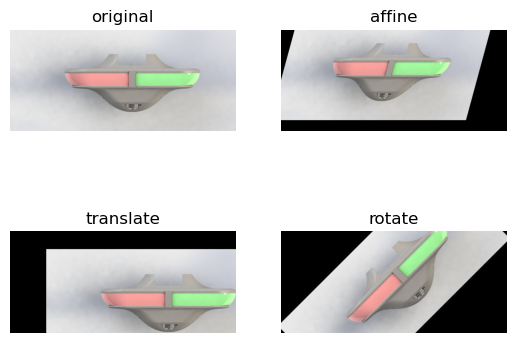

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("s.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols = img.shape[:2]

pts1 = np.float32([[55,217],[130,217],[260,153]])
pts2 = np.float32([[35,187],[100,187],[230,123]])
M = cv2.getAffineTransform(pts1,pts2)
affine = cv2.warpAffine(img,M,(cols,rows))

M1 = np.float32([[1,0,100],[0,1,50]])
translate = cv2.warpAffine(img,M1,(cols,rows))

M2 = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
rotate = cv2.warpAffine(img,M2,(cols,rows))

names =[("original",img),("affine",affine),("translate",translate),("rotate",rotate)]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(names[i][1])
    plt.title(f"{names[i][0]}")
    plt.axis("off")
plt.show()

# import imutils

imutils.translate(img,x,y)#معادل آفین انتقال

imutils.rotate(image,angle,center,scale)#معادل آفین چرخش

imutils,rotate_bound(image,angle...)#با چرخش تمام تصویر را داخل کادر نگه میدارد

# تبدیلات پرسپکتیو

پرسپکتیو تصویر را در 3بعد تبدیل میکندونیاز به 4 نقطه داردوماتریس تبدیل آن3در3است

درآفین تبدیل در جای خودش کج میشود ولی در پرسپکتیو در 3 بعد حرکت داده میشود

# ماتریس تبدیل

M= cv2.getPerspectiveTransform(src,dst)

src=float32 مختصات 4 نقطه دلخواه از تصویربا فرمت 

dst=بعد از اعمال تبدیلfloat32 مختصات نهایی همان 4 نقطه دلخواه از تصویربا فرمت 

M=float ماتریس تبدیل به ابعاد3در3 واز نوع 



# دستور تبدیل پرسپکتیو بعد از ایجاد ماتریس پرسپکتیو

dst = warpPerspective(src,M,dSize)

src=تصویر ورودی

M=ماتریس تبدیل که ازفرمول بالا بدست آمده

dSize=ابعاد تصویر خروجی(ارتفاع-عرض)


In [3]:
import cv2
import numpy as np


def Get_points(event,x,y,flags,parm):
    global pts,clone
    if event == cv2.EVENT_LBUTTONDBLCLK:
        pts.append([x,y])
        cv2.circle(clone,(x,y),3,(255,0,0),-1)


def prespective(points,image):
    p1,p2,p3,p4 = points
    width = np.sqrt(((p1[1]-p2[1])**2)+((p1[0]-p2[0])**2))#فرمول بدست آوردن فاصله 2 نقطه
    height = np.sqrt(((p2[1]-p3[1])**2)+((p2[0]-p3[0])**2))#فرمول بدست آوردن فاصله 2 نقطه
    dst = np.float32([[0,height],[width,height],[width,0],[0,0]])
    src = np.float32([points])
    M = cv2.getPerspectiveTransform(src,dst)
    warp = cv2.warpPerspective(image,M,(int(width),int(height)))
    return warp

pts = []
img = cv2.imread("pelak.jpeg")
clone = img.copy() 
cv2.namedWindow("Paper")
cv2.setMouseCallback("Paper",Get_points)

while True:
    cv2.imshow("Paper",clone)
    key = cv2.waitKey(1)
    if key==ord("q"):
        break
    elif key== ord("p"):
        if len(pts)==4:
            warped = prespective(pts,img)
            cv2.imshow("correct",warped)
cv2.destroyAllWindows()        

# پرسپکتیو تعمیم یافته

از این روش زمانی استفاده میشود که برای بدست آوردن ماتریس تبدیل حداقل 10نقطه نیاز باشد

(M,mask) = cv2.findHormography(srcPoints,dscPoints,method,ransacReprojThresh)

srcPoints= float32 مختصات نقاط دلخواه از تصویربا فرمت

dscPoints=بعد از اعمال تبدیلfloat32 مختصات نهایی همان نقاط دلخواه از تصویربا فرمت

method= 0 - RANSAC - LMEDS -RHO

ransacReprojThresh= استفاده میشودومقدار بیشترین خطای قابل قبول برای ماتریس تبدیل را تعیین میکندRANSACوRHO تنها در روش های 

# تبدیلات ریختی

تبدیلات ریختی برای حذف نویزها از ماسک هستند و 2 نوع فرسایش و گسترش دارند

# فرسایش

فرسایش ضخامت قسمت سفید رنگ ماسک را کم میکند و بدین ترتیب نویزها از بین میرود

dst = cv2.erode(src,kernel,iterations)

src=تصویر ورودی که میتواندیک تا چندکانال داشته باشد

kernel=باشد که پیشفرض3در3 مقدار میگیردnp.uint8ماتریس هسته که باید از نوع 

iterations=تعداد دفعات تکرار فیلتر روی تصویر ورودی



# گسترش

گسترش ضخامت قسمت سفید رنگ ماسک را زیاد میکند و بدین ترتیب نویزهای مشکی از بین میرود 

گسترش برعکس فرسایش عمل میکندوبرای زمینه سفید با نویزهای مشکی کاربرد دارد

dst = cv2.dilate(src,kernel,iterations)

src=تصویر ورودی که میتواندیک تا چندکانال داشته باشد

kernel=باشد که پیشفرض3در3 مقدار میگیردnp.uint8ماتریس هسته که باید از نوع 

iterations=تعداد دفعات تکرار فیلتر روی تصویر ورودی



In [2]:
import cv2
import numpy as np

img= cv2.imread("pelak3.png")
kernel=np.ones((3,3),dtype="uint8")

erode = cv2.erode(img,kernel,iterations=1)
dilate = cv2.dilate(img,kernel,iterations=1)
result = np.vstack((img,erode,dilate))
cv2.imshow("Homograghy Transformations",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
cv2.__version__

'4.8.1'

# تبدیلات ریختی ترکیبی

از ترکیب فرسایش و گسترش به دست می آید

dst = cv2.morphologyEx(inputArray,op,kernel,iterations)

inputArray=تصویر ورودی 

op= نوع تبدیل ریختی(MORPH_OPEN,MORPH_CLOSE,MORPH_GRADIENT,MORPH_TOPHAT,MORPH_BLACKHAT)

kernel=باشد که پیشفرض3در3 مقدار میگیردnp.uint8ماتریس هسته که باید از نوع

iterations=تعداد دفعات تکرار فیلتر روی تصویر ورودی

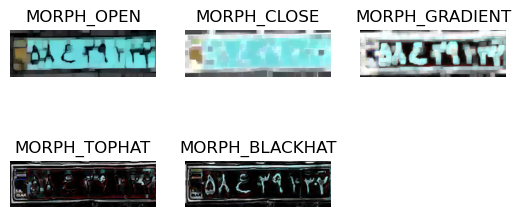

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("C:\\Users\\Admin\\OpenCv\\p.png")
cv2.imshow("Original",img)
OP = [("MORPH_OPEN",cv2.MORPH_OPEN),("MORPH_CLOSE",cv2.MORPH_CLOSE),("MORPH_GRADIENT",cv2.MORPH_GRADIENT),
      ("MORPH_TOPHAT",cv2.MORPH_TOPHAT),("MORPH_BLACKHAT",cv2.MORPH_BLACKHAT)]
kernel = np.ones((9,9),np.uint8)
for i in range(len(OP)):
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.morphologyEx(img,OP[i][1],kernel,iterations=1))
    plt.title(f"{OP[i][0]}")
    plt.axis("off")
plt.show() 
cv2.waitKey()
cv2.destroyAllWindows()

# ماتریس هسته

ماتریس هسته میتواند به شکل مربع،بیضی وصلیب باشد

kernel = cv2.getStructuringElement(shape,ksize)

shape = شکلی که درایه های ماتریس باید داشته باشد(MORPH_RECT,MORPH_ELLIPSE,MORPH_CROSS)

ksize = ابعاد ماتریس هسته

In [23]:
import cv2

cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [24]:
import cv2

cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [2]:
import cv2

cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

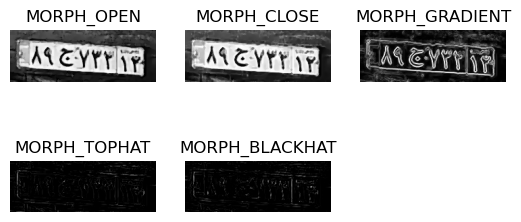

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("pelak3.png")
cv2.imshow("Original",img)
OP = [("MORPH_OPEN",cv2.MORPH_OPEN),("MORPH_CLOSE",cv2.MORPH_CLOSE),("MORPH_GRADIENT",cv2.MORPH_GRADIENT),
      ("MORPH_TOPHAT",cv2.MORPH_TOPHAT),("MORPH_BLACKHAT",cv2.MORPH_BLACKHAT)]
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
for i in range(len(OP)):
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.morphologyEx(img,OP[i][1],kernel,iterations=1))
    plt.title(f"{OP[i][0]}")
    plt.axis("off")
plt.show() 
cv2.waitKey()
cv2.destroyAllWindows()